
A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.0 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "C:\Users\kunal\AppData\Roaming\Python\Python312\site-packages\ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "C:\Users\kunal\AppData\Roaming\Python\Python312\site-packages\traitlets\config\application.py", line 1075, in launch_instance
    app.start()
  File "C:\Users\kunal\AppData\Roaming\Python\Python312\site-packages\ipykernel\kernelapp.py", line 739, in start
    self.io_lo

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:00<00:00, 14096921.16it/s]


Extracting ./data\MNIST\raw\train-images-idx3-ubyte.gz to ./data\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 348978.56it/s]


Extracting ./data\MNIST\raw\train-labels-idx1-ubyte.gz to ./data\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 3846493.47it/s]


Extracting ./data\MNIST\raw\t10k-images-idx3-ubyte.gz to ./data\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<?, ?it/s]


Extracting ./data\MNIST\raw\t10k-labels-idx1-ubyte.gz to ./data\MNIST\raw



RuntimeError: Numpy is not available

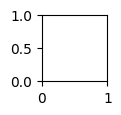

In [1]:
import torch 
from dataset import get_mnist
import matplotlib.pyplot as plt
import numpy as np


trainset, testset = get_mnist("./data")
mnist_full = torch.utils.data.ConcatDataset([trainset, testset])

def display_samples(dataset):
    plt.figure(figsize=(10, 5))
    for i in range(10):
        # Get indices of samples for the current digit
        indices = []
        for j in range(len(dataset.datasets)):
            indices += (dataset.datasets[j].targets == i).nonzero().squeeze().tolist()
        # Plot first 5 samples of each digit
        for j in range(5):
            plt.subplot(5, 10, j*10+i+1)
            plt.imshow(dataset[indices[j]][0].numpy().squeeze(), cmap='gray')
            plt.axis('off')
    plt.show()

# Display sample images of each digit
display_samples(mnist_full)


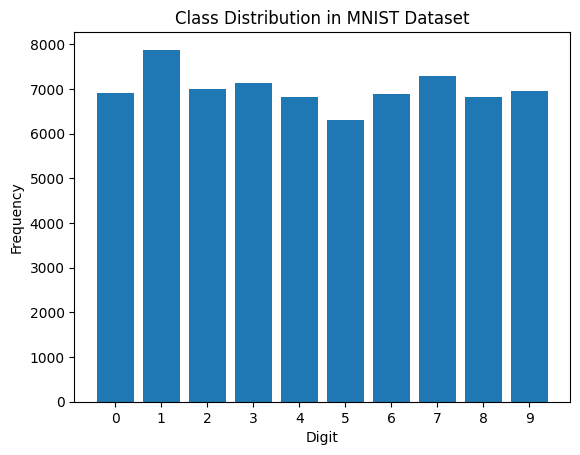

In [2]:
# Calculate class distribution
class_distribution = torch.zeros(10, dtype=torch.int)
for dataset in mnist_full.datasets:
    class_distribution += torch.bincount(dataset.targets, minlength=10)
# Plot class distribution
plt.bar(np.arange(10), class_distribution)
plt.xticks(np.arange(10), np.arange(10))
plt.xlabel('Digit')
plt.ylabel('Frequency')
plt.title('Class Distribution in MNIST Dataset')
plt.show()